# Analysis of results from AOMA logged at h5 file

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from scipy import signal
import dataloader_halogaland.dataloader as dl
import os

/Users/emilneby/miniforge3/envs/master/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
loader = dl.HDF5_result_loader(path=os.getcwd()+'/../Referencebased_Cov-SSI/results/output_4_AOMA.h5')

In [3]:
print(np.array(loader.hdf5_file[loader.periods[0]]['Frequencies']))

[0.0547043  0.05470484 0.11587799 0.14149678 0.20295992 0.22000561
 0.28793013 0.28795777 0.35328549 0.35328413 0.42951096 0.45038643
 0.50942681 0.50943481 0.59920451 0.59920282 0.62172738 0.69222462
 0.69223171 0.79768125 0.79768578 0.93215189 0.98479   ]


In [20]:
freqs = []
num = []
temps = []
mean_wind = []
max_wind = []
execution_time = []
high_freqs = []

counter = 0
for period in loader.periods:
    counter += 1
    frequencies = np.array(loader.hdf5_file[period]['Frequencies'])
    freqs.extend(frequencies)
    mean_wind.append(loader.hdf5_file[period].attrs['Mean wind speed'])
    max_wind.append(loader.hdf5_file[period].attrs['Max wind speed'])
    temps.append(loader.hdf5_file[period].attrs['Mean temp'])
    execution_time.append(loader.hdf5_file[period].attrs['Execution time'])
    num.extend(np.ones_like(frequencies)*counter)

    #pick element from frequencies with value closest to 0.8 Hz
    high_freqs.append(min(list(frequencies), key=lambda x:abs(x-0.8)))

In [21]:
#Load FEM results to use as a bench mark
hf = h5py.File(os.getcwd()+ '/../../../FEM/HalogalandModel_exportmodal.h5', 'r')
f = np.array(hf.get('f'))
filter_f = f<1
f = f[filter_f]
print(f)

[0.05386703 0.1159167  0.1198293  0.1441354  0.2058538  0.2175673
 0.2281544  0.2673675  0.2764731  0.2792568  0.28367    0.2860988
 0.348027   0.3974806  0.4243394  0.4380004  0.4381267  0.4511921
 0.4627525  0.4763434  0.4797579  0.4806404  0.4827925  0.4832696
 0.4991885  0.503346   0.5235713  0.5267565  0.5290912  0.5592325
 0.5686418  0.5850167  0.5863821  0.5914302  0.602249   0.6458548
 0.6503595  0.6774036  0.6815385  0.6898496  0.7074438  0.7086733
 0.7845061  0.7878422  0.788882   0.8617281  0.8821169  0.8828331
 0.8905289  0.9032722  0.9232758  0.9482778  0.9493794  0.9494863
 0.9678676  0.9839966 ]


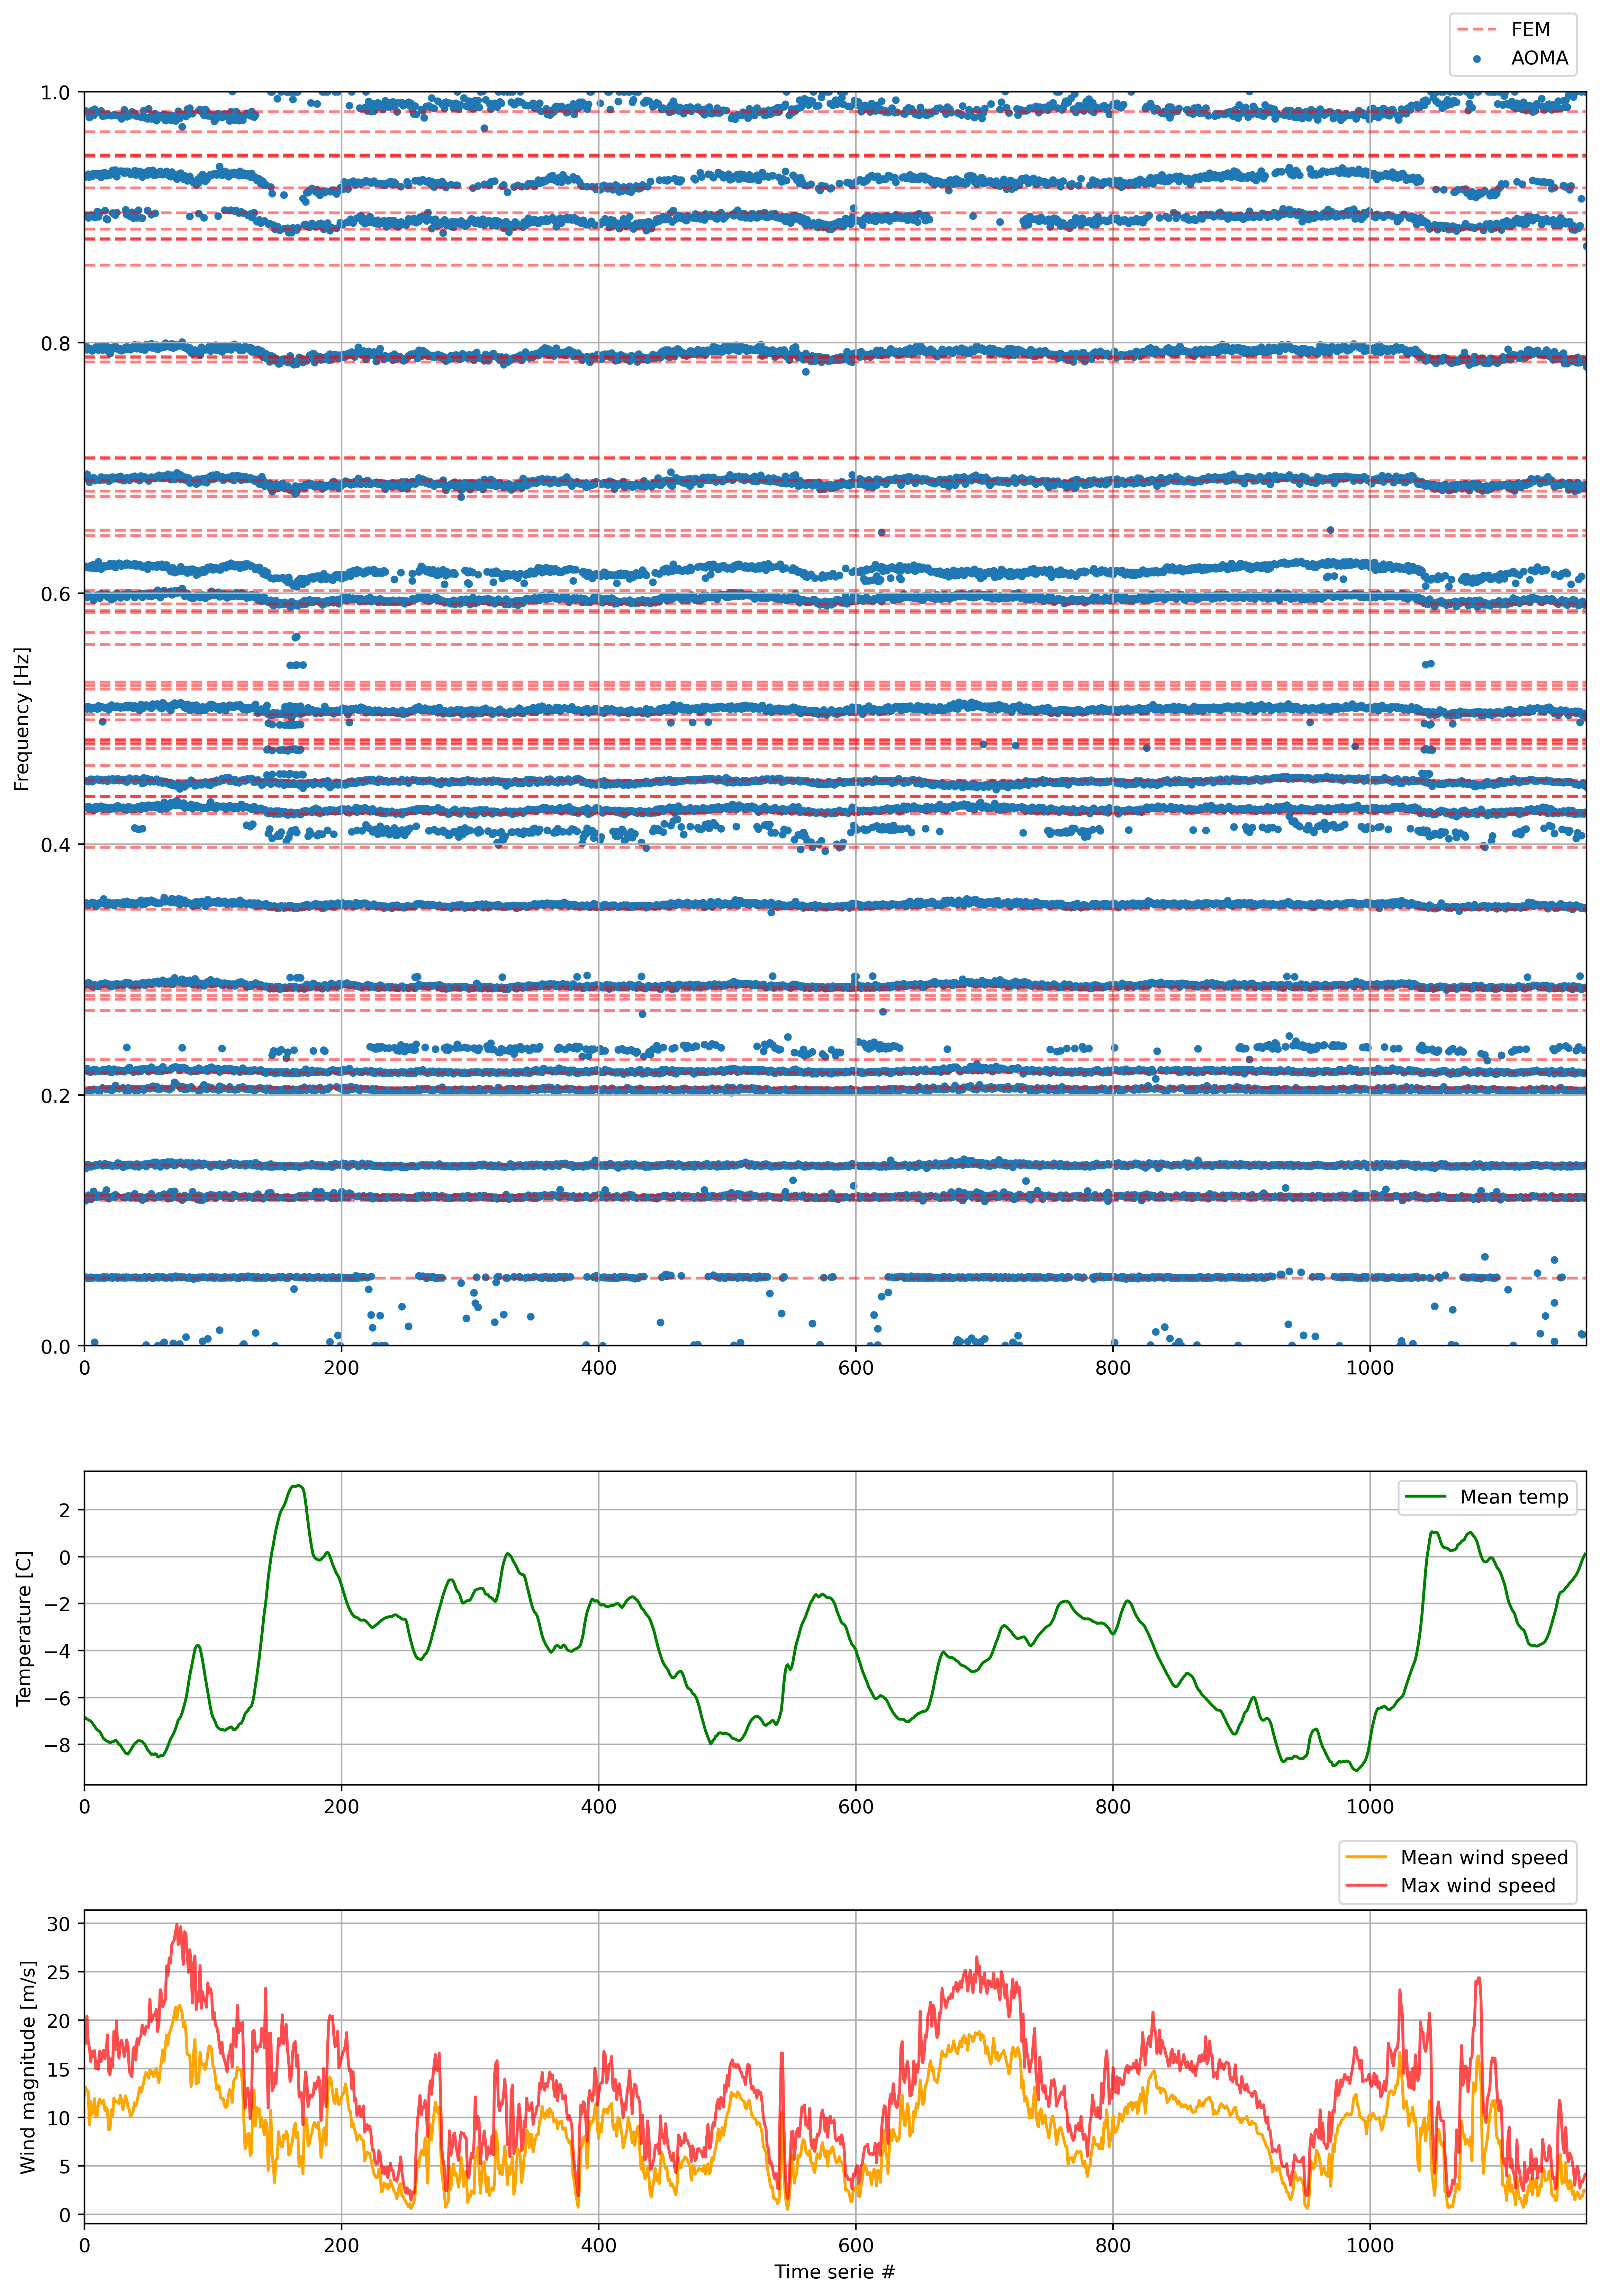

In [22]:
fig, (a1, a2, a3) = plt.subplots(3,1, figsize=(14, 20), dpi=400, gridspec_kw={'height_ratios': [8, 2, 2]})

a1.axhline(y = f[0], color='r', linestyle = '--', alpha = 0.5, label = 'FEM')
for i in range(len(f)-1):
    a1.axhline(y = f[i+1], color='r', linestyle = '--', alpha = 0.5)


a1.scatter(np.array(num), np.array(freqs), marker='.', label = 'AOMA')

a1.set_ylim((0,1))
a1.set_xlim((0, len(mean_wind)))
a1.set_ylabel('Frequency [Hz]')
a1.legend(loc = 'upper right', bbox_to_anchor=(1, 1.07))
plt.xlabel('Time serie #')
a1.grid()

#a2 = a1.twinx()
#a2.plot(np.arange(0, len(execution_time)), np.array(execution_time), label = 'Execution time')
a3.plot(np.arange(0, len(mean_wind)), np.array(mean_wind), label = 'Mean wind speed', color='orange')
a3.plot(np.arange(0, len(mean_wind)), np.array(max_wind), label = 'Max wind speed', color='red', alpha=0.7)
a3.set_xlim((0, len(mean_wind)))
a3.set_ylabel('Wind magnitude [m/s]')
a3.legend(loc = 'upper right', bbox_to_anchor=(1, 1.25))
a3.grid()

a2.plot(np.arange(0, len(temps)), np.array(temps), label = 'Mean temp', color='green')
a2.set_ylabel('Temperature [C]')
a2.set_xlim((0, len(mean_wind)))
a2.legend(loc = 'upper right')
a2.grid()
plt.savefig('freq_vs_time_3.jpg')
plt.show()


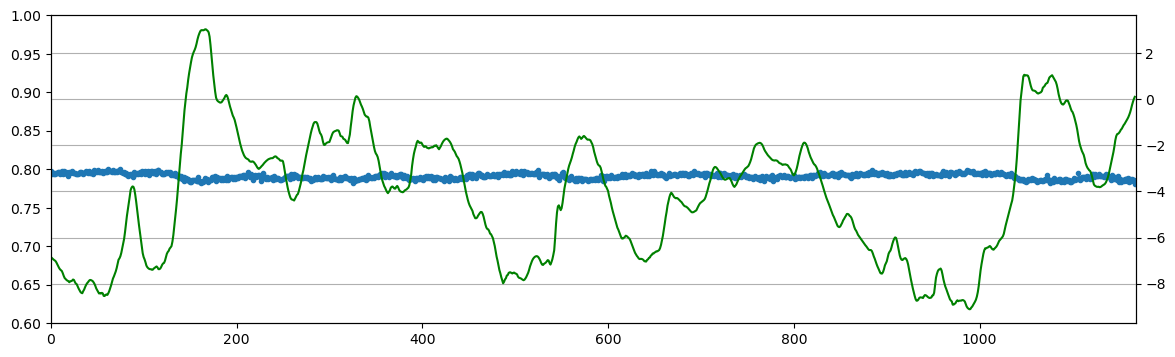

In [39]:
fig, ax1 = plt.subplots(figsize=(14,4))
ax1.scatter(np.arange(0, len(high_freqs)), np.array(high_freqs), marker='.', label = 'AOMA')
ax2 = plt.twinx()
ax2.plot(np.arange(0, len(temps)), np.array(temps), label = 'Mean temp', color='green')
ax1.set_ylim([0.6,1])
plt.xlim([0, len(high_freqs)])
plt.grid()

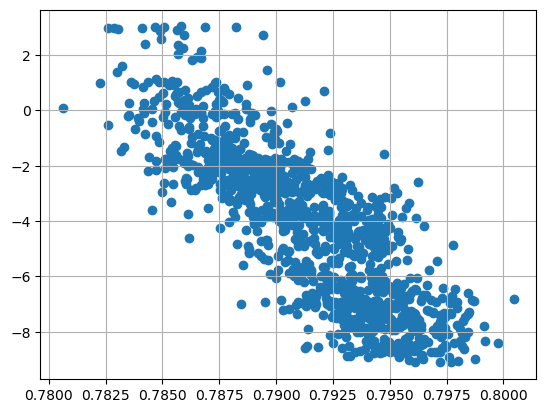

In [43]:
plt.scatter(np.array(high_freqs), np.array(temps))
plt.grid()